### **Homework**

In this homework, we'll deploy the bees vs wasps model we trained in the previous homework.

Download the model from here:

https://github.com/alexeygrigorev/large-datasets/releases/download/wasps-bees/bees-wasps.h5

### **Question 1**

Now convert this model from Keras to TF-Lite format.

What's the size of the converted model?

- 21 Mb
- 43 Mb
- 80 Mb
- 164 Mb

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite

In [2]:
model = keras.models.load_model('bees-wasps.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)



INFO:tensorflow:Assets written to: C:\Users\rluka\AppData\Local\Temp\tmp5c82blde\assets


INFO:tensorflow:Assets written to: C:\Users\rluka\AppData\Local\Temp\tmp5c82blde\assets


Answer: **The size of the converted model is 43 Mb**

###  **Question 2**

To be able to use this model, we need to know the index of the input and the index of the output.

What's the output index for this model?

- 3
- 7
- 13
- 24

In [3]:
interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

Answer: **The output index for the model is 13**

### **Prepare the Image**

You'll need some code for downloading and resizing images. You can use this code:

In [4]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

For that, you'll need to have pillow installed:

In [14]:
!pip install pillow

Let's download and resize this image:

https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg

Based on the previous homework, what should be the target size for the image?

### **Question 3**

Now we need to turn the image into numpy array and pre-process it.

Tip: Check the previous homework. What was the pre-processing we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

- 0.3450980
- 0.5450980
- 0.7450980
- 0.9450980

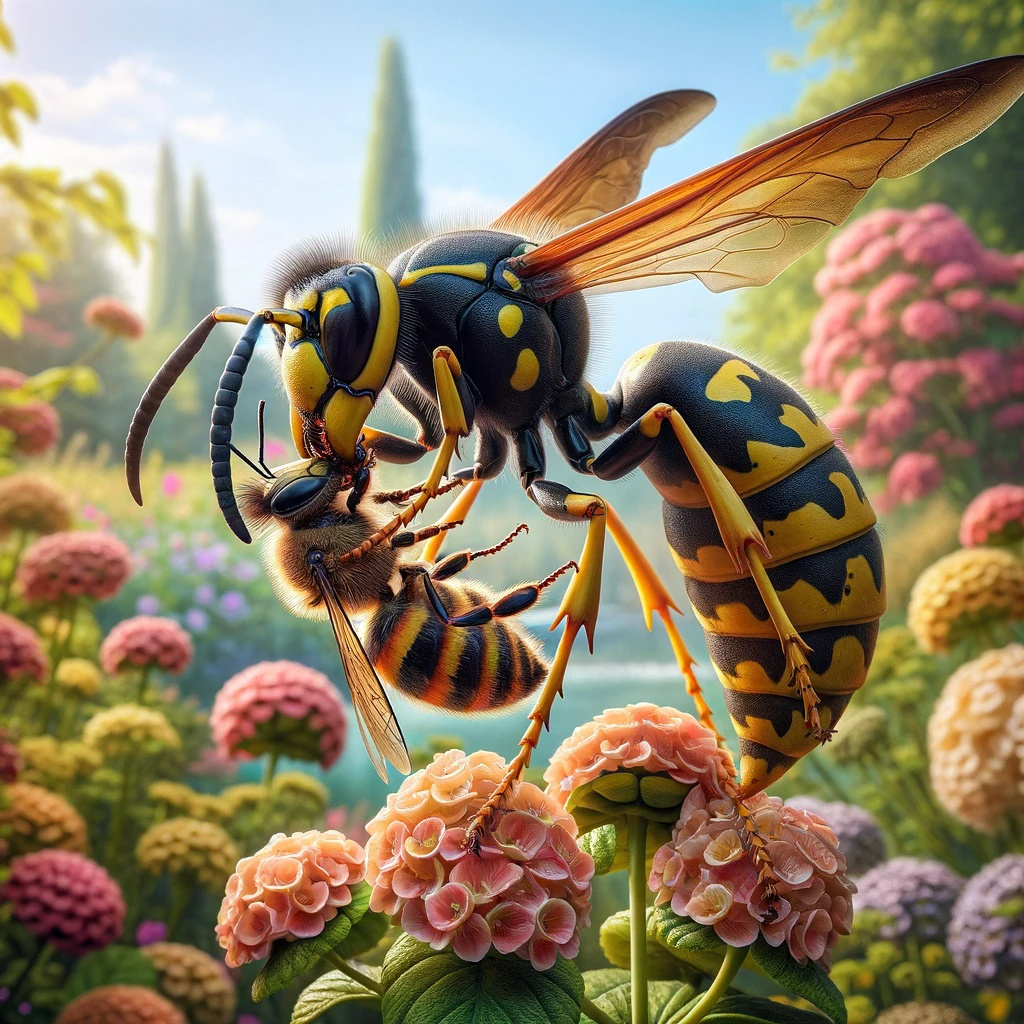

In [18]:
img = download_image('https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg')
img

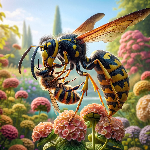

In [19]:
img = prepare_image(img, target_size=(150, 150))
img

In [20]:
def preprocess_input(x):
    x /= 127.5
    x -= 1
    return x

In [21]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [22]:
X[0, 0, 0, 0]

0.8901961

Answer: **The first pixel value for R channel is 0.890 ~ 0.945**

### **Question 4**

Now let's apply this model to this image. What's the output of the model?

- 0.258
- 0.458
- 0.658
- 0.858

In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [24]:
preds[0, 0]

0.1389202

Answer: **The output of the model is 0.139~0.258**

### **Prepare the lambda code**

Now you need to copy all the code into a separate python file. You will need to use this file for the next two questions.

Tip: you can test this file locally with ipython or Jupyter Notebook by importing the file and invoking the function from this file.

### **Docker**

For the next two questions, we'll use a Docker image that we already prepared. This is the Dockerfile that we used for creating the image:

FROM public.ecr.aws/lambda/python:3.10

COPY bees-wasps-v2.tflite .

And pushed it to agrigorev/zoomcamp-bees-wasps:v2.

A few notes:

- The image already contains a model and it's not the same model as the one we used for questions 1-4.
- The version of Python is 3.10, so you need to use the right wheel for TF-Lite. For Tensorflow 2.14.0, it's https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl

### **Question 5**

Download the base image agrigorev/zoomcamp-bees-wasps:v2. You can easily make it by using docker pull command.

So what's the size of this base image?

- 162 Mb
- 362 Mb
- 662 Mb
- 962 Mb

You can get this information when running docker images - it'll be in the "SIZE" column.

Answer: **The size of the base image is 662 Mb**

### **Question 6**

Now let's extend this docker image, install all the required libraries and add the code for lambda.

You don't need to include the model in the image. It's already included. The name of the file with the model is bees-wasps-v2.tflite and it's in the current workdir in the image (see the Dockerfile above for the reference). The provided model requires the same preprocessing for images regarding target size and rescaling the value range than used in homework 8.

Now run the container locally.

Score this image: https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg

What's the output from the model?

- 0.2453
- 0.4453
- 0.6453
- 0.8453

Answer: **The output from the prediction is 0.3521 ~ 0.4453**